In [9]:
from region import Area
from pathlib import Path

In [10]:
constraint_file = Path("advection_constraints.txt")
regions: list[Area] = []
with open(constraint_file, "r") as infile:
    N = int(infile.readline())
    for i in range(N):
        m = int(infile.readline())
        curr_region = Area()
        for j in range(m):
            x_C, t_C, const = map(float, infile.readline().split())
            curr_region.add_ineq(x_C, t_C, const)
        regions.append(curr_region)

In [11]:
for region in regions:
    print(region.constraints)

[(-1.0, 0.5, 0.2), (1.0, -0.5, 0.2)]
[(-1.0, 0.5, -0.2)]
[(1.0, -0.5, -0.2)]


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [13]:
x_vals = np.random.uniform(-1, 1, (2000, 1))
t_vals = np.random.uniform(0, 1, (2000, 1))
X = np.hstack([x_vals, t_vals])

In [14]:
for x, t in X:
    for region in regions:
        if not region.is_in_area(x, t):
            continue
        region.points.append([x, t])
        break

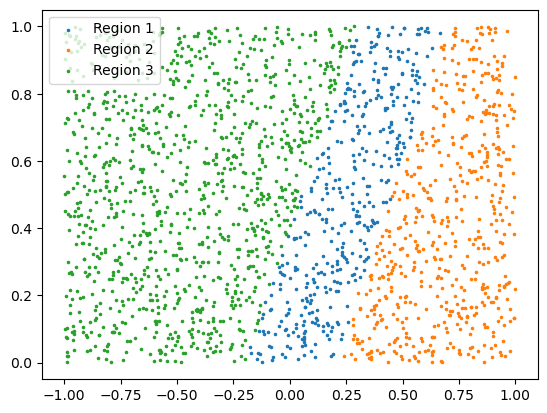

In [15]:
for i, region in enumerate(regions):
    region.points_to_df()
    plt.scatter(
        region.df_points["x"], region.df_points["t"], s=2.5, label=f"Region {i+1}"
    )
plt.legend()

In [1]:
from region import Region

/Users/augustfemtehjell/opt/miniconda3/envs/FYS5429/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
total_region = Region("advection_constraints.txt")

In [3]:
total_region.test_points()

array([[ 0.09762701,  0.81151847],
       [ 0.43037873,  0.47608399],
       [ 0.20552675,  0.52315599],
       ...,
       [-0.03978439,  0.83000295],
       [ 0.28772807,  0.93280618],
       [ 0.00354626,  0.30833843]])

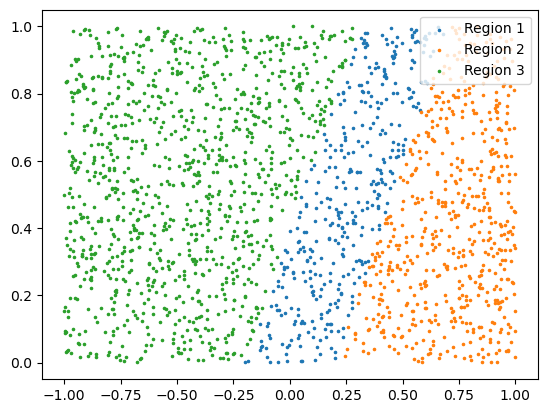

In [4]:
total_region.plot_points()